<a href="https://colab.research.google.com/github/Cknowles11/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Carlos_Knowles_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-07-15 00:19:46--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.96.54
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.96.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’

instacart_online_gr 100%[===================>] 196.03M  45.6MB/s    in 4.7s    

2020-07-15 00:19:51 (41.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’ saved [205548478/205548478]



In [ ]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [ ]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [ ]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products__train = pd.read_csv('order_products__train.csv')
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
mycolumns = ['order_id', 'product_id', 'add_to_cart_order']

In [ ]:
order_products = pd.concat([order_products__prior, order_products__train], axis = 0)

In [ ]:
order_products = order_products[mycolumns]
order_products.head()

,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5


In [ ]:
cols = ['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']
orders = orders[cols]

In [ ]:
orders.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7
2,1,473747,3,3,12
3,1,2254736,4,4,7
4,1,431534,5,4,15


In [ ]:
prod_col = ['product_id', 'product_name']

In [ ]:
products = products[prod_col]
products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [ ]:
condition = (products['product_name']== 'Banana' )| (products['product_name']== 'Bag of Organic Bananas') |(products['product_name'] == 'Organic Strawberries') | (products['product_name']== 'Organic Baby Spinach') |(products['product_name']=='Organic Hass Avocado') |(products['product_name']=='Organic Avacado') |(products['product_name']=='Large Lemon') |(products['product_name']=='Strawberries') |(products['product_name']=='Limes') | (products['product_name']=='Organic Whole Milk')

In [ ]:
products = products[condition]

In [ ]:
order_merge = pd.merge(order_products, orders)

In [ ]:
final_merge = pd.merge(order_merge, products)

In [ ]:
final_merge.sample(10)

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,product_name
721133,1195145,47209,1,138563,35,3,15,Organic Hass Avocado
996190,928997,24852,8,65320,95,1,15,Banana
412645,1450565,13176,2,55914,31,0,17,Bag of Organic Bananas
2019568,1958273,16797,1,118710,19,2,18,Strawberries
119956,1701131,21903,8,67870,9,4,15,Organic Baby Spinach
1173403,2208802,24852,1,98703,15,1,16,Banana
273103,192543,13176,5,75395,84,0,9,Bag of Organic Bananas
191882,2716056,21903,1,174213,4,5,11,Organic Baby Spinach
1759416,3101382,27845,2,15491,2,6,17,Organic Whole Milk
538819,2588340,13176,1,54356,26,3,21,Bag of Organic Bananas


In [ ]:
final_merge['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

In [ ]:
product_percents = final_merge['product_name'].value_counts(normalize=True)
product_percents

Banana                    0.219907
Bag of Organic Bananas    0.176774
Organic Strawberries      0.123351
Organic Baby Spinach      0.112666
Organic Hass Avocado      0.098867
Large Lemon               0.071972
Strawberries              0.066893
Limes                     0.065646
Organic Whole Milk        0.063924
Name: product_name, dtype: float64

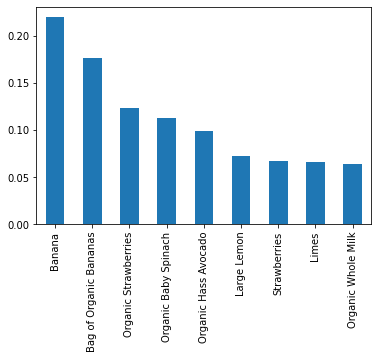

In [ ]:
product_percents.plot(kind='bar');

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [ ]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [ ]:
tidy_table2 = table2.reset_index().melt(id_vars = 'index').rename(columns= {
    'index': 'Treatment',
    'variable': 'Name',
    'value': 'Result'
})
tidy_table2['Treatment'] = tidy_table2['Treatment'].str.replace('treatment', '')
tidy_table2

,Treatment,Name,Result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [ ]:
# tidy -> table2
wide_table2 = tidy_table2.pivot_table(index='Name', columns = 'Treatment', values = 'Result')
wide_table2

Treatment,a,b
Name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [ ]:
flights = sns.load_dataset('flights')

In [ ]:
# Flights Pivot Table
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [ ]:
wide_flights = flights.pivot_table(index = 'year', columns = 'month', values='passengers')
wide_flights

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
order_products__prior2 = pd.read_csv('order_products__prior.csv')
order_products__train2 = pd.read_csv('order_products__train.csv')
orders2 = pd.read_csv('orders.csv')
products2 = pd.read_csv('products.csv')

In [ ]:
order_products2 = pd.concat([order_products__prior2, order_products__train2], axis = 0)

In [ ]:
order_prod_col = ['order_id', 'product_id', 'add_to_cart_order']

In [ ]:
order_products2 = order_products2[order_prod_col]

In [ ]:
order_products2.head()

,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5


In [ ]:
orders2_col = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day']

In [ ]:
orders2 = orders2[orders2_col]

In [ ]:
orders2.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7
2,473747,1,3,3,12
3,2254736,1,4,4,7
4,431534,1,5,4,15


In [ ]:
prod_col = ['product_id', 'product_name']

In [ ]:
products2 = products2[prod_col]

In [ ]:
products2.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [ ]:
merge1 = pd.merge(orders2, order_products2)
merge1.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order
0,2539329,1,1,2,8,196,1
1,2539329,1,1,2,8,14084,2
2,2539329,1,1,2,8,12427,3
3,2539329,1,1,2,8,26088,4
4,2539329,1,1,2,8,26405,5


In [ ]:
final_merge1 = pd.merge(merge1, products2)

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
##### YOUR CODE HERE #####